In [48]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
from IPython.core.pylabtools import figsize
%matplotlib inline

# Loading data

In [4]:
#changong data types to datetime format for users table

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)
users = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
0,350,59.5,170,550,True,22,2018-04-30 15:08:54+00:00,2018-05-01 00:17:49+00:00
1,400,8.0,20,60,True,61,2018-05-07 14:38:32+00:00,2018-05-07 15:38:18+00:00
2,400,8.0,20,648,True,61,2018-05-07 15:40:44+00:00,2018-05-08 01:26:18+00:00
3,400,28.0,70,648,True,61,2018-05-07 15:41:04+00:00,2018-05-08 01:26:18+00:00
4,350,17.5,50,546,True,22,2018-05-11 15:18:23+00:00,2018-05-12 00:23:01+00:00


In [5]:
#changing data types to datetime format for users table

charging_to_clean = pd.read_csv('./data/charging.csv')
charging_to_clean['ConnectionTime'] = pd.to_datetime(charging_to_clean.connectionTime, infer_datetime_format=True) 
charging_to_clean['DisconnectTime'] = pd.to_datetime(charging_to_clean.disconnectTime, infer_datetime_format=True) 
charging_to_clean['DoneCharging'] = pd.to_datetime(charging_to_clean.doneChargingTime, infer_datetime_format=True) 

charging = charging_to_clean.drop(columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'Unnamed: 0'])
charging.head()

,_id,clusterID,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,ConnectionTime,DisconnectTime,DoneCharging
0,5bc90cb9f9af8b0d7fe77cd2,39,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00
1,5bc90cb9f9af8b0d7fe77cd3,39,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00
2,5bc90cb9f9af8b0d7fe77cd4,39,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00
3,5bc90cb9f9af8b0d7fe77cd5,39,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00
4,5bc90cb9f9af8b0d7fe77cd6,39,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00


# Getting data about cars arrived per day for 2019 - 2020

Question: what time period I have data for?

Answer: April 2018 - June 2020

In [6]:
charging.ConnectionTime.max(),  charging.ConnectionTime.min()

(Timestamp('2020-06-29 23:09:54+0000', tz='UTC'),
 Timestamp('2018-04-25 11:08:04+0000', tz='UTC'))

In [7]:
users.Modified.max(), users.Modified.min()

(Timestamp('2020-06-29 23:11:53+0000', tz='UTC'),
 Timestamp('2018-04-30 15:08:54+0000', tz='UTC'))

In [11]:
# data = charging["ConnectionTime"].groupby(
#     [charging["ConnectionTime"].dt.year, 
#      charging["ConnectionTime"].dt.month, 
#      charging["ConnectionTime"].dt.day]).count()

In [60]:
msk = charging["ConnectionTime"].dt.year > 2019 
interval = charging[msk]

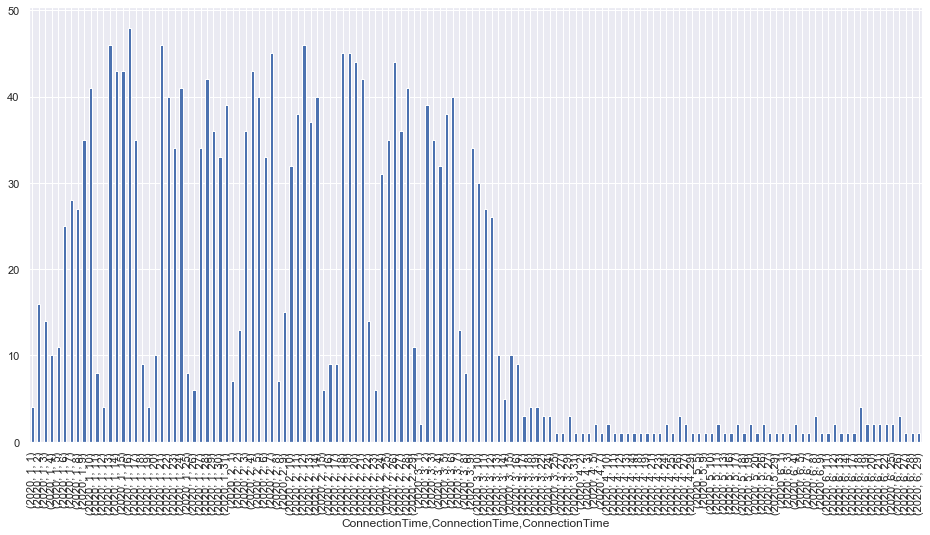

In [64]:
data = interval["ConnectionTime"].groupby(
    [interval["ConnectionTime"].dt.year, 
     interval["ConnectionTime"].dt.month, 
     interval["ConnectionTime"].dt.day]).count()
data.plot(kind="bar", figsize = (16, 8))

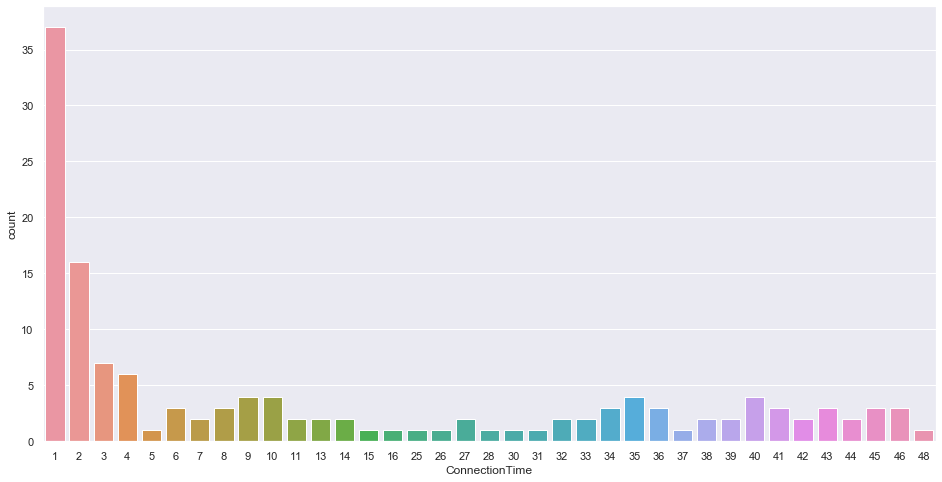

In [62]:
sns.set(style="darkgrid", )
fig, ax = plt.subplots(figsize = (16, 8))
ax = sns.countplot(data)
ax.set_xlabel
ax.set_xticks = charging["ConnectionTime"] #need to figure this

Text(0.5, 1.0, 'Did the number of cars arrived at the charging station change over time?')

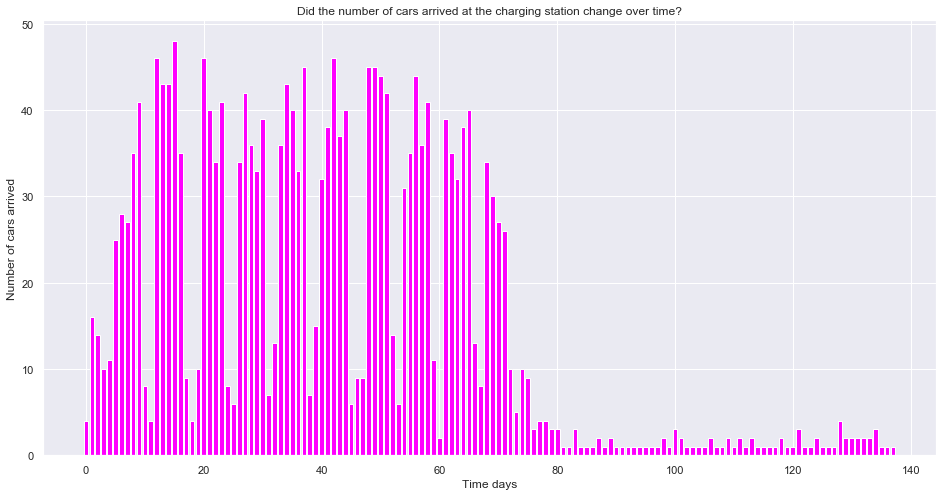

In [70]:
fig, ax = plt.subplots(figsize = (16, 8))
n_data = len(data)
plt.bar(np.arange(n_data), data, color="magenta")
plt.xlabel('Time days')
plt.ylabel('Number of cars arrived')
plt.title('Did the number of cars arrived at the charging station change over time?')
#plt.xticks(np.arange(n_data))

# Using PyMC3 to model cars arriving random variable via geometric distribution

In [71]:
import pymc3 as pm
import theano.tensor as tt

In [72]:
with pm.Model() as model:
    alpha = 1.0/data.mean()
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_data - 1)

In [73]:
with model:
    idx = np.arange(n_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [74]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=data)

In [108]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 13 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [109]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

(array([  4.,   4.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   8.,
          0.,   3.,  11.,   4.,   5.,  13.,  23.,  10.,   2.,   8.,  22.,
         23.,  55.,  25.,  14.,  31.,  69.,  54.,  28.,  30.,  43., 105.,
         41., 122., 141., 108., 160., 117.,  99.,  98., 135., 139., 125.,
        149., 202., 241., 197., 242., 393., 251., 228., 248., 404., 141.,
        280., 311., 324., 271., 346., 394., 273., 422., 348., 391., 343.,
        360., 460., 390., 643., 443., 304., 355., 460., 329., 545., 418.,
        343., 412., 409., 404., 303., 291., 288., 268., 262., 154., 301.,
        236., 360., 316., 177., 173., 134., 115., 158., 104., 182., 208.,
        199., 140.,  85., 129.,  80., 112.,  52.,  61.,  59.,  67.,  50.,
         28.,  33.,  21.,  33.,  35.,  64.,   8.,  33.,  29.,   1.,  13.,
          9.,   9.,  18.,   1.,   2.,   3.,   0.,   2.,   4.,   2.,  12.,
          0.,   6.,   0.,  11.,   0.,   3.]),
 array([25.31462236, 25.34623603, 25.37784969, 25.40946335, 25.441

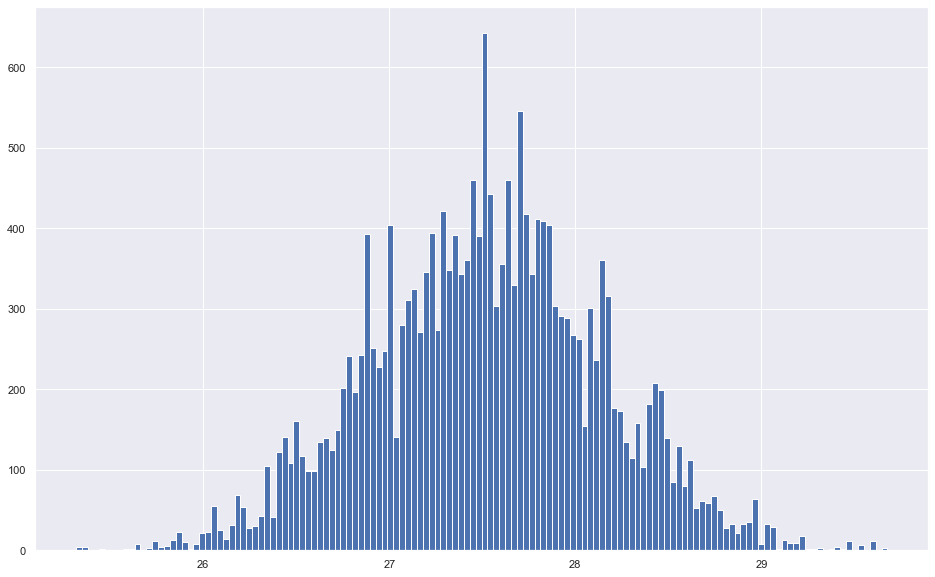

In [110]:
plt.hist(lambda_1_samples, bins=n_data)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   6.,   3.,
          7.,   0.,  12.,  12.,   9.,   6.,  14.,   8.,  18.,  33.,  21.,
         29.,  55.,  40.,  72.,  77.,  96.,  71.,  95., 101.,  90., 115.,
        165., 179., 132., 139., 199., 174., 306., 153., 253., 240., 282.,
        364., 376., 340., 357., 369., 383., 398., 420., 423., 506., 493.,
        471., 342., 508., 432., 493., 533., 483., 489., 458., 385., 530.,
        346., 427., 399., 339., 477., 385., 265., 351., 249., 323., 322.,
        197., 209., 256., 203., 215., 237., 207., 136., 137., 124., 102.,
        116., 148.,  91.,  96., 113.,  58.,  73.,  64.,  86.,  60.,  41.,
         42.,  32.,  31.,  46.,  22.,  22.,  32.,  31.,  26.,  12.,   9.,
          7.,  12.,   2.,   3.,   0.,   4.,   3.,   0.,   5.,   1.,   9.,
          0.,   1.,   2.,   0.,   0.,   5.,   0.,   0.,   1.,   2.,   0.,
          1.,   8.,   3.,   0.,   0.,   5.]),
 array([1.3244743 , 1.33503045, 1.3455866 , 1.35614275, 1.3666989 

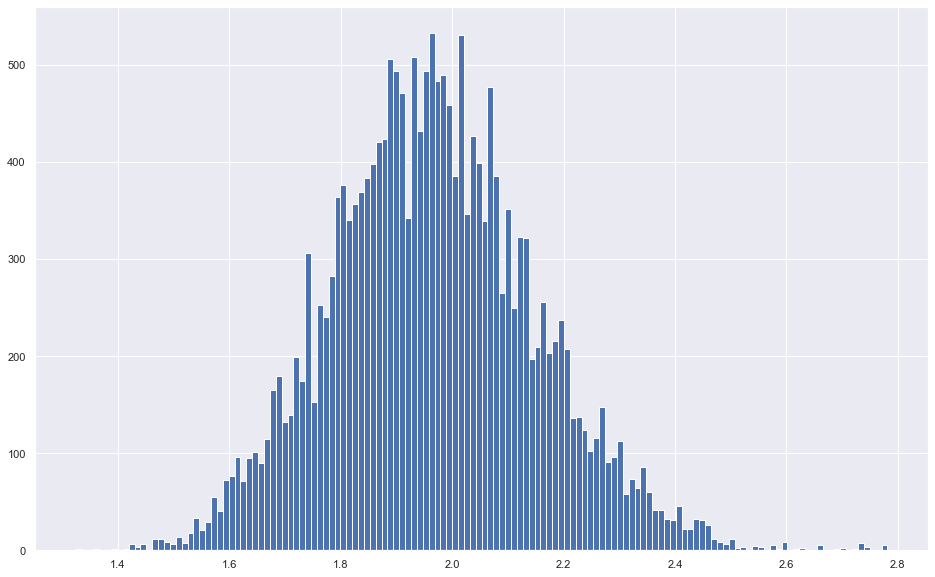

In [111]:
plt.hist(lambda_2_samples, bins=n_data)

In [112]:
n_data

138

(array([ 6763.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

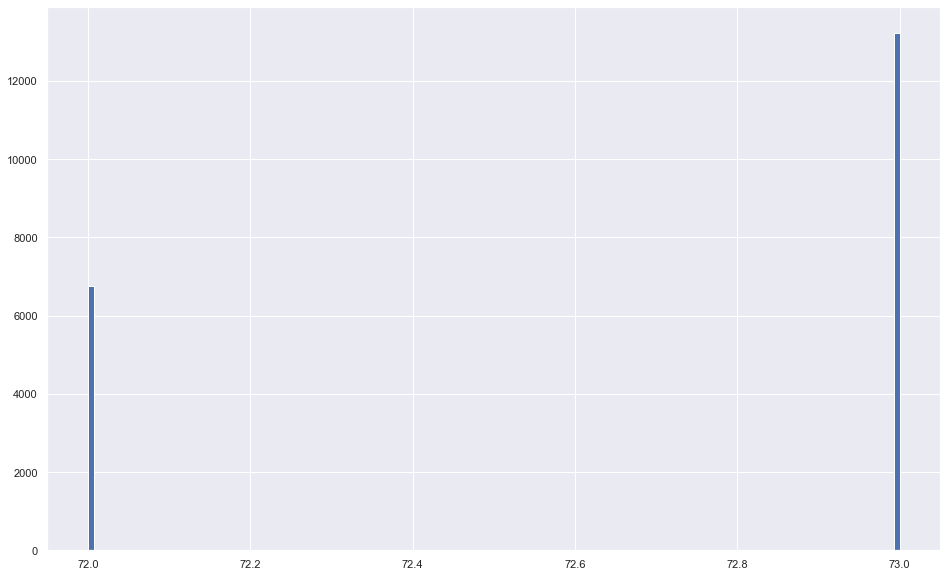

In [113]:
plt.hist(tau_samples, bins=n_data)

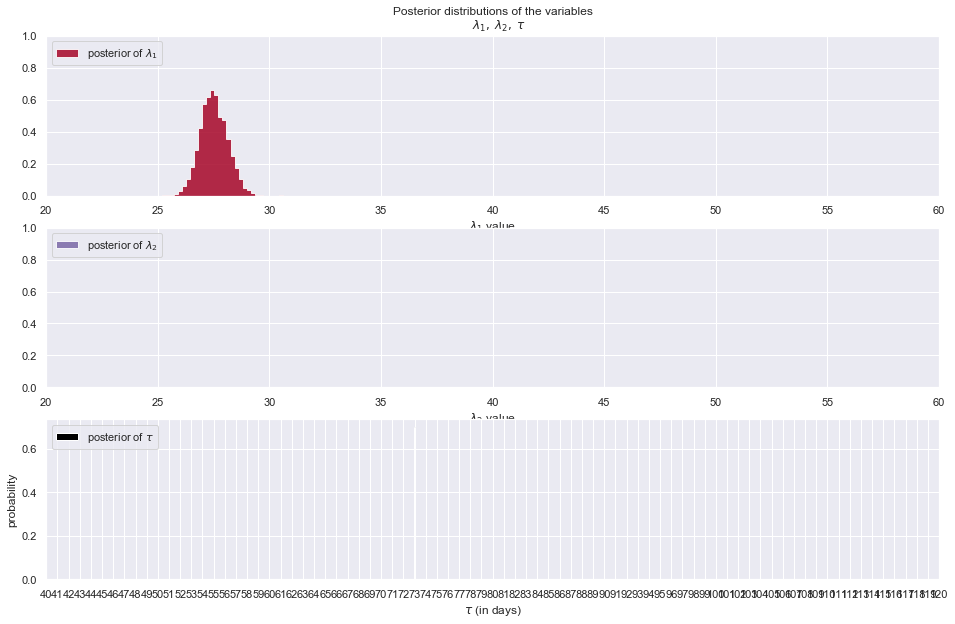

In [105]:
figsize(16, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([20, 60])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([20, 60])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_data, alpha=1,
         label=r"posterior of $\tau$",
         color="black", weights=w, rwidth=2.)
plt.xticks(np.arange(n_data))

plt.legend(loc="upper left")
#plt.ylim([0, .75])
plt.xlim([40, 120])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

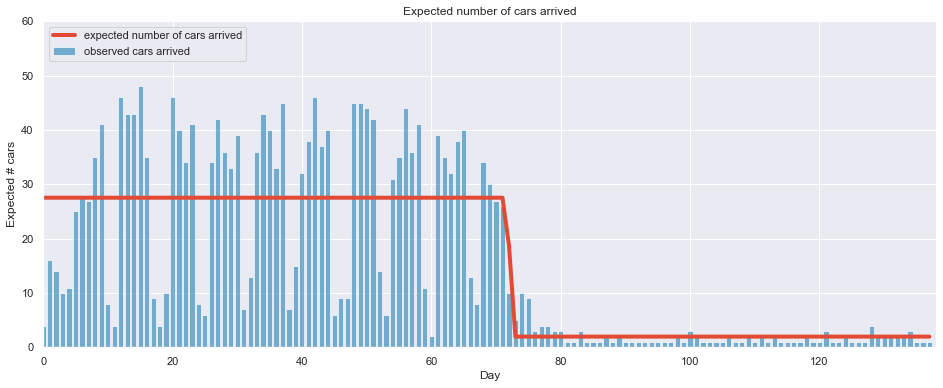

In [121]:
figsize(16, 6)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_cars_per_day = np.zeros(n_data)
for day in range(0, n_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_cars_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_data), expected_cars_per_day, lw=4, color="#E24A33",
         label="expected number of cars arrived")
plt.xlim(0, n_data)
plt.xlabel("Day")
plt.ylabel("Expected # cars")
plt.title("Expected number of cars arrived")
plt.ylim(0, 60)
plt.bar(np.arange(len(data)), data, color="#348ABD", alpha=0.65,
        label="observed cars arrived")

plt.legend(loc="upper left");